In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
# настройки отображения графиков
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

### Orders - заказы у продавцов

In [3]:
orders = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/orders.csv')

In [4]:
# Сортировка данных по дате
orders = orders.sort_values('created_at', ascending=True)
orders.reset_index(drop=True, inplace=True)
orders.head()

,id,created_at,seller_id,product_price,quantity,status
0,1,2020-08-03 10:39:52.847,2,911.50,1,BuyerDidNotCome
1,4,2020-08-03 10:45:59.203,2,911.50,1,Rejection
2,2,2020-08-03 10:48:48.763,2,911.50,2,Rejection
3,3,2020-08-03 10:51:56.99,1,911.50,3,New
4,5,2020-08-03 10:58:08.137,1,5001.99,7,New


In [5]:
orders['created_at'].min()

'2020-08-03 10:39:52.847'

In [6]:
orders.shape

(338, 6)

In [7]:
# Тип данных
orders.dtypes

id                 int64
created_at        object
seller_id          int64
product_price    float64
quantity           int64
status            object
dtype: object

In [8]:
# Корректировка формата даты
orders['created_at'] = pd.to_datetime(orders['created_at'])

In [9]:
# Извлечение даты
orders['created_at']=[d.date() for d in orders['created_at']] 

In [10]:
# Количество заказов по дням
# orders_date_count=orders.groupby(pd.Grouper(key="created_at", freq="D")).count()

# Количество заказов по дням
orders_date_count=orders.groupby('created_at').count()
orders_date_count.dtypes

id               int64
seller_id        int64
product_price    int64
quantity         int64
status           int64
dtype: object

In [11]:
# Количество продавцов
num_seller = orders['seller_id'].value_counts(sort=False)
len(num_seller)

31

<AxesSubplot:>

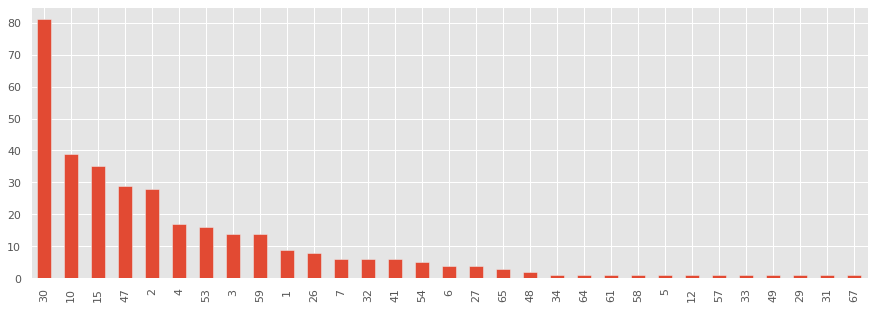

In [12]:
# Количество заказов у продавцов
orders['seller_id'].value_counts().plot.bar()

In [13]:
orders['status'].value_counts()

Issued             155
Rejection           66
New                 41
Canceled            38
BuyerDidNotCome     38
Name: status, dtype: int64

Text(0.5, 1.0, 'Статусы заказов у продавцов')

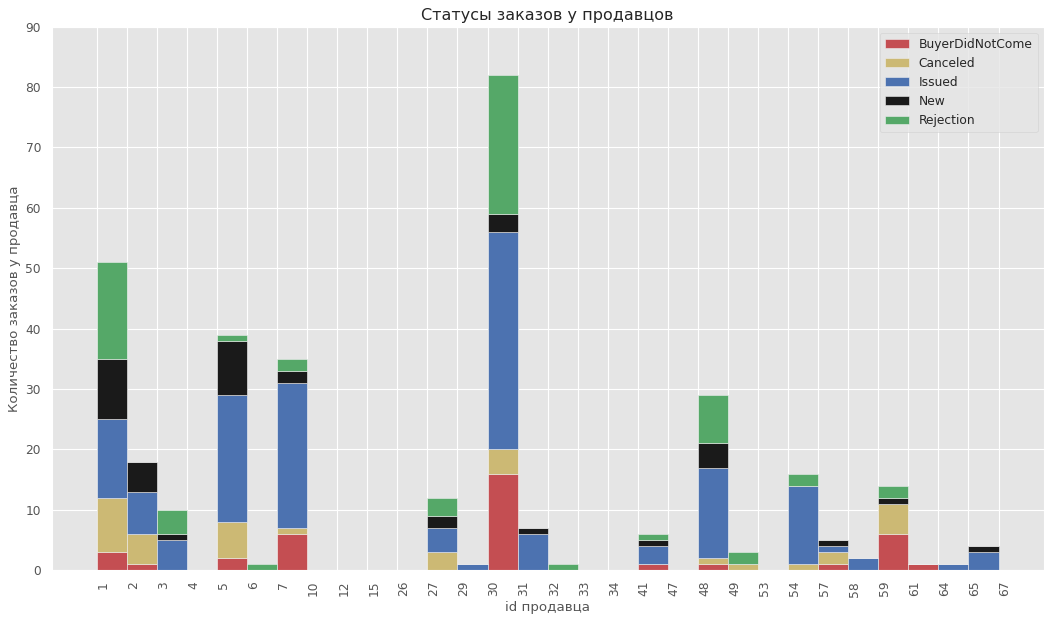

In [14]:
# Статусы заказов у продавцов

# Данные
x_var = 'seller_id'
groupby_var = 'status'
orders_agg = orders.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [orders[x_var].values.tolist() for i, orders in orders_agg]

# График
plt.figure(figsize=(16, 9), dpi=80)
n, bins, patches = plt.hist(vals,
                            30,
                            stacked=True,
                            density=False,
                            color=['r', 'y', 'b', 'k', 'g'])

# Легенда
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
plt.legend({
    group: col
    for group, col in zip(
        np.unique(orders[groupby_var]).tolist(), colors[:len(vals)])
})

plt.ylim(0, 90)
plt.xticks(ticks=bins,
           labels=np.unique(orders[x_var]).tolist(),
           rotation=90,
           horizontalalignment='left')
plt.xlabel('id продавца')
plt.ylabel('Количество заказов у продавца')
plt.title('Статусы заказов у продавцов')

In [15]:
# # Период обработки заказов

# sns.kdeplot(data=orders, x='created_at', hue='status')
# plt.xlabel('Дата создания заказа')
# plt.ylabel('Количество заказов')
# plt.title('Период обработки заказов')

In [16]:
# Достигнут критерий успешности пробного запуска >= 10 продаж на продавца
orders_issued = orders[orders['status'] == 'Issued']

sellers_id_groups = orders_issued.groupby(['seller_id'])

success_sellers = sellers_id_groups.filter(
    lambda group: group['status'].count() >= 10)

Text(0.5, 1.0, '>= 10 продаж на продавца')

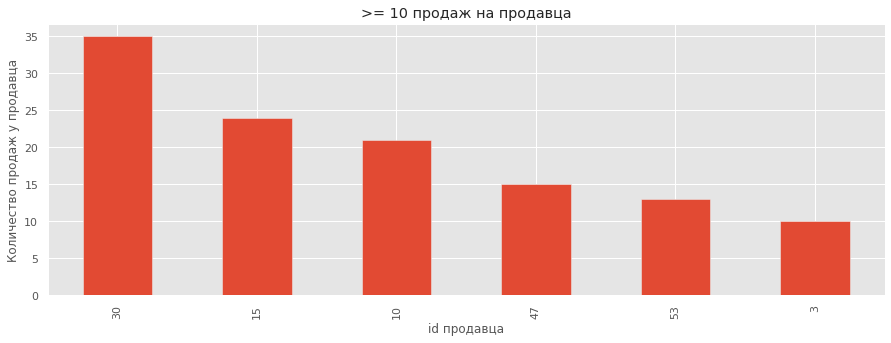

In [17]:
# Id продавцов, достигнувших критерия успешности
success_sellers['seller_id'].value_counts().plot.bar()

plt.xlabel('id продавца')
plt.ylabel('Количество продаж у продавца')
plt.title('>= 10 продаж на продавца')

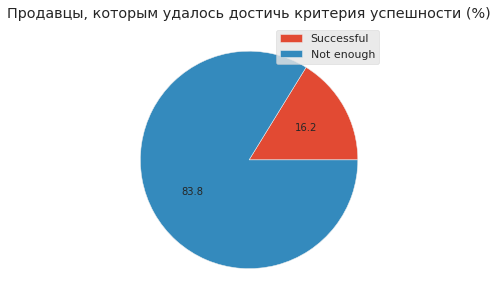

In [18]:
# Процент продавцов, которым удалось достичь критерия успешности
num_success_sellers = success_sellers['seller_id'].value_counts(sort=False)

plt.pie([len(num_success_sellers), len(num_seller)],autopct='%.1f')
plt.title('Продавцы, которым удалось достичь критерия успешности (%)')
plt.legend(
    loc = 'best', labels = ('Successful','Not enough') )
plt.show()

### Registrations - заявки потенциальных продавцов

In [19]:
registrations = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/registrations.csv')
registrations.head()

,id,inn,created_at,is_accepted,is_seller
0,5781db93a6444c921c45efcc7f30bd08,2.301126e+11,2020-07-17 10:11:40.204382,False,False
1,e8862ca7b667307568ca408c05c57cce,5.047905e+11,2020-07-31 15:54:30.906968,False,False
2,838ae3edd30e77940522cb950fb6a77d,NaN,2020-08-03 08:09:59.410891,False,True
3,d8aa22a597b538ddef927675a20fec45,NaN,2020-07-29 10:03:43.949494,False,True
4,d30bd4297f49a76595df3eb348b59eaa,NaN,2020-07-30 12:48:44.982906,False,True


In [20]:
registrations.dtypes

id              object
inn            float64
created_at      object
is_accepted       bool
is_seller         bool
dtype: object

In [21]:
registrations.rename(columns=lambda x: x.replace('inn', 'Inn'), inplace=True)
registrations.rename(
    columns=lambda x: x.replace('created_at', 'created_at_registrations'),
    inplace=True)

In [22]:
registrations['is_seller'].value_counts()

True     4675
False    1862
Name: is_seller, dtype: int64

In [23]:
# Количество заявок потенциальных продавцов
registrations.shape

(6537, 5)

In [24]:
registrations.dtypes

id                           object
Inn                         float64
created_at_registrations     object
is_accepted                    bool
is_seller                      bool
dtype: object

In [25]:
# Заполнение отсутствующих данных значением 0
registrations = registrations.fillna(0)

In [26]:
# Корректировка форматов даты и ИНН
registrations['created_at_registrations'] = pd.to_datetime(
    registrations['created_at_registrations'])
registrations['Inn'] = registrations['Inn'].astype(int)

In [27]:
# Продавцы, успешно прошедшие регистрацию
registrations_is_correct = registrations[(registrations['is_accepted'] ==True) 
                              & (registrations['is_seller'] == True)]
registrations_is_correct = registrations_is_correct.sort_values('created_at_registrations',
                                          ascending=True)
registrations_is_correct.reset_index(drop=True, inplace=True)
registrations_is_correct

,id,Inn,created_at_registrations,is_accepted,is_seller
0,3aa8856e733439ab813f31334918591b,744709932397,2020-07-08 11:21:22.054524,True,True
1,d37ef554b61b33220c87b001b1f7a0bc,2724220678,2020-07-13 06:45:56.916201,True,True
2,3749723e1447ed22b9caf8829b1f3783,27810334737,2020-07-13 07:15:07.828710,True,True
3,b5f6fb3626c3a0c744f6811217e00984,434546079680,2020-07-13 07:47:46.554344,True,True
4,5477fdfd5d4ced6514cd615f7c5e028d,7017329974,2020-07-13 07:51:35.371213,True,True
...,...,...,...,...,...
81,30103da2752407e8d267352a823a7d80,5905302430,2020-11-05 02:30:40.321752,True,True
82,e78711447557fa807c0ea9d100f1801e,667115487638,2020-11-07 06:50:33.759575,True,True
83,7ba0a247ec42fc6e854de159a71a93e0,702000860312,2020-11-10 06:07:34.392419,True,True
84,300a8c8eb7187853903685f3e9f479dd,7017148329,2020-11-11 03:16:37.012612,True,True


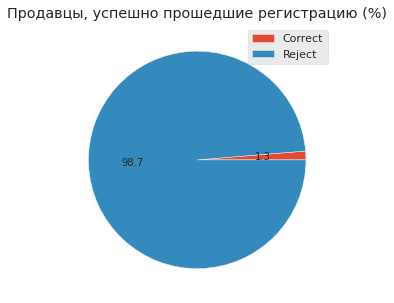

In [28]:
# Продавцы, успешно прошедшие регистрацию
correct=len(registrations_is_correct)
reject=len(registrations)
plt.pie([correct,reject],autopct='%.1f')
plt.legend(
    loc = 'best', labels = ('Correct','Reject') )
plt.title('Продавцы, успешно прошедшие регистрацию (%)')
plt.show()

In [29]:
registrations.is_accepted.value_counts()

False    6246
True      291
Name: is_accepted, dtype: int64

In [30]:
# Сортировка данных по дате
registrations = registrations.sort_values('created_at_registrations',
                                          ascending=True)
registrations.reset_index(drop=True, inplace=True)

### Sellers - учётные записи зарегистрированных продавцов

In [31]:
sellers = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/sellers.csv',
    converters={'contractor_json': json.loads},
    header=0,
    quotechar='"')
contractor = sellers.join(pd.io.json.json_normalize(
    sellers["contractor_json"])).drop(["contractor_json"], axis=1)
contractor.head()

<ipython-input-31-6a9fd22de0f4>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  contractor = sellers.join(pd.io.json.json_normalize(


,id,created_at,Inn,Bulk,City,Flat,Ogrn,House,Оkpo,Status,Street,ZipCode,LegalName,RegionName,Settlement
0,1,2020-08-03 07:12:03.963452,5544554451,None,None,None,None,None,None,0,None,None,None,None,None
1,2,2020-08-03 07:38:31.136276,0000000000,None,None,None,None,None,None,0,None,None,None,None,None
2,3,2020-08-04 05:58:33.473403,700202974358,None,Томск,None,317703100080340,None,0114009213,1,None,None,None,Томская область,None
3,4,2020-08-06 05:05:37.043578,7017216138,None,Томск,None,1087017018395,дом 9,85256729,1,улица Киевская,634012,"Общество с ограниченной ответственностью ""Авто...",Томская область,None
4,5,2020-08-06 06:03:06.613762,352500119022,None,None,None,316290100082018,None,0104421401,1,None,None,None,Архангельская область,None


In [32]:
contractor.rename(columns=lambda x: x.replace('id', 'seller_id'), inplace=True)
contractor.rename(
    columns=lambda x: x.replace('created_at', 'created_at_sellers'),
    inplace=True)

In [33]:
contractor.shape

(72, 15)

In [34]:
contractor.dtypes

seller_id              int64
created_at_sellers    object
Inn                   object
Bulk                  object
City                  object
Flat                  object
Ogrn                  object
House                 object
Оkpo                  object
Status                 int64
Street                object
ZipCode               object
LegalName             object
RegionName            object
Settlement            object
dtype: object

In [35]:
# Корректировка формата даты
contractor['created_at_sellers'] = pd.to_datetime(
    contractor['created_at_sellers'])

In [36]:
# Заполнение отсутствующих данных значением 0
contractor = contractor.fillna(0)

(array([18435., 18444., 18465., 18475., 18496., 18506., 18527., 18536.,
        18557., 18567.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

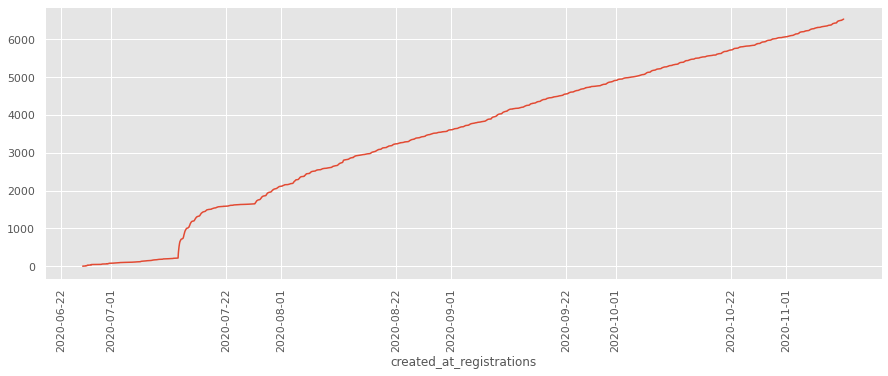

In [37]:
# Сбор заявок потенциальных продавцов
x = registrations.created_at_registrations
y = registrations.index
sns.lineplot(x=x, y=y, data=registrations)
plt.xticks(rotation=90)

(array([18475., 18489., 18506., 18520., 18536., 18550., 18567., 18581.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

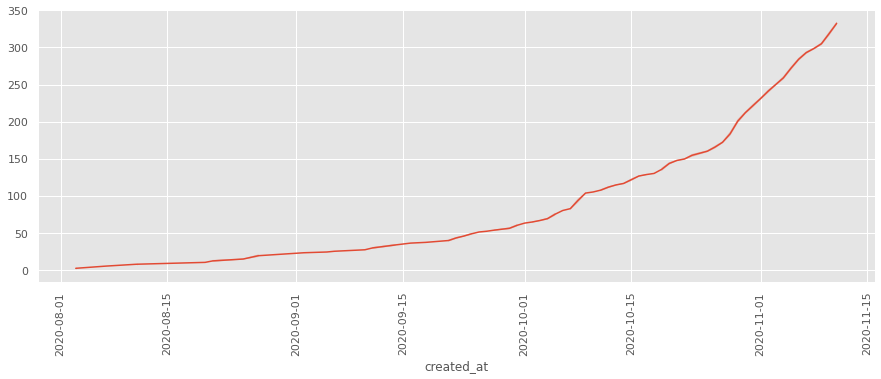

In [38]:
# Размещение заказов
x = orders.created_at
y = orders.index
sns.lineplot(x=x, y=y, data=orders)
plt.xticks(rotation=90)

(array([18475., 18489., 18506., 18520., 18536., 18550., 18567., 18581.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

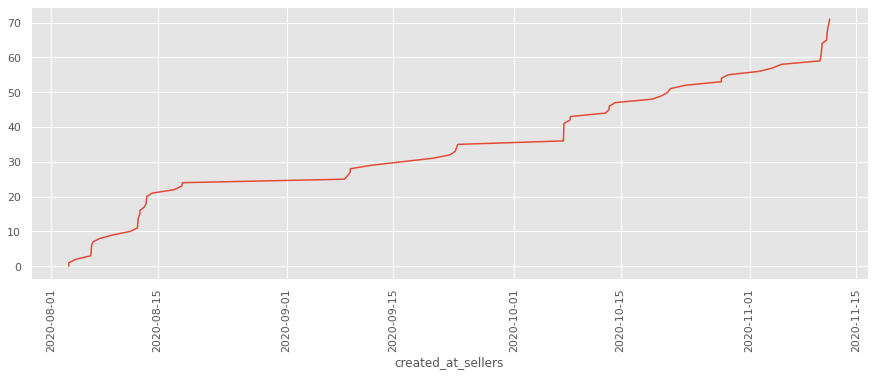

In [39]:
# Создание учётных записей зарегистрированных продавцов
x = contractor.created_at_sellers
y = contractor.index
sns.lineplot(x=x, y=y, data=sellers)
plt.xticks(rotation=90)

In [40]:
# Данные о наиболее успешном продавце
thirtieth_seller = orders[orders['seller_id'].isin([30])]
orders_with_saler_name = pd.merge(thirtieth_seller,
                                  contractor,
                                  on=['seller_id'],
                                  how='left')
orders_with_saler_name['Inn'] = orders_with_saler_name['Inn'].astype(int)
info_thirtieth_seller = pd.merge(orders_with_saler_name,
                                 registrations,
                                 on=['Inn'],
                                 how='left')
info_thirtieth_seller.rename(
    columns=lambda x: x.replace('created_at', 'created_at_orders'),
    inplace=True)
info_thirtieth_seller

,id_x,created_at_orders,seller_id,product_price,quantity,status,created_at_orders_sellers,Inn,Bulk,City,...,Status,Street,ZipCode,LegalName,RegionName,Settlement,id_y,created_at_orders_registrations,is_accepted,is_seller
0,33,2020-09-14,30,225.0,1,Rejection,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
1,34,2020-09-14,30,225.0,1,BuyerDidNotCome,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
2,35,2020-09-14,30,225.0,1,Rejection,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
3,36,2020-09-14,30,225.0,1,Rejection,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
4,37,2020-09-16,30,223.0,1,Rejection,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,302,2020-11-09,30,1167.0,1,BuyerDidNotCome,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
77,303,2020-11-09,30,2105.0,1,BuyerDidNotCome,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
78,313,2020-11-10,30,4188.0,1,Rejection,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True
79,330,2020-11-11,30,882.0,2,BuyerDidNotCome,2020-09-12 04:13:28.469386,702435078164,0,Северск,...,1,0,0,0,Томская область,0,39064bfcf34938cea611f5dfcc4c94d8,2020-08-17 02:06:23.600490,True,True


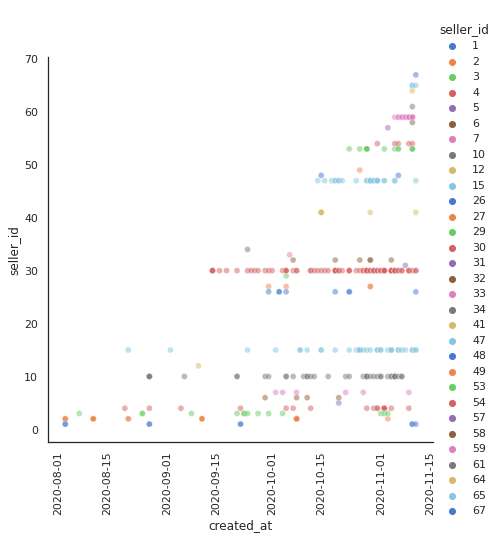

In [41]:
# sns.lineplot(data = info_thirtieth_seller)
sns.set_theme(style='white')

sns.relplot(x='created_at',
            y='seller_id',
            hue='seller_id',
            sizes=(40, 400),
            alpha=.5,
            palette='muted',
            height=6,
            data=orders)
plt.xticks(rotation=90);

In [42]:
orders.head()

,id,created_at,seller_id,product_price,quantity,status
0,1,2020-08-03,2,911.50,1,BuyerDidNotCome
1,4,2020-08-03,2,911.50,1,Rejection
2,2,2020-08-03,2,911.50,2,Rejection
3,3,2020-08-03,1,911.50,3,New
4,5,2020-08-03,1,5001.99,7,New


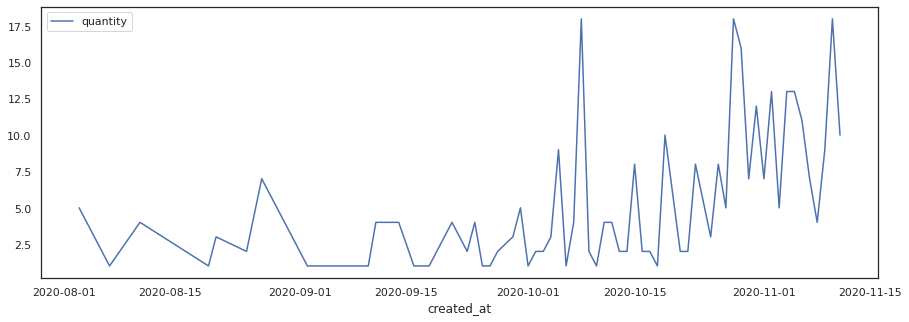

In [43]:
# base = plt.gca().transData
# rot = transforms.Affine2D().rotate_deg(90)
# orders_date_count

# for item in orders_date_count:
#     print("=====")
#     print(item)
# orders_date_count.plot(x='created_at', y='id')

# # df.groupby('country').plot(x='year', y='unemployment')


orders_date_count.plot(y='quantity')#x='created_at', y='id')

# contractor['created_at_sellers'].plot()
# registrations['created_at_registrations'].plot()



# # info_thirtieth_seller.loc[0:25,'value'].plot()
# # info_thirtieth_seller.loc[25:150, 'value'].plot()
# # info_thirtieth_seller.loc[150:, 'value'].plot()
plt.show()

In [44]:
orders_date_count.dtypes

id               int64
seller_id        int64
product_price    int64
quantity         int64
status           int64
dtype: object